First name : Adrien
Last name : Montaigne
SID : 2248806

**Step I : Import librairies**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

**Step II : Import dataset**

In [2]:
df = pd.read_csv("diabetes-1.csv")

**Step III : Split it into Test and Train**

In [3]:
from sklearn.model_selection import train_test_split

Y = df.iloc[:,-1]
X = df.iloc[:,:-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [4]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


**Step IV : Data visualisation**

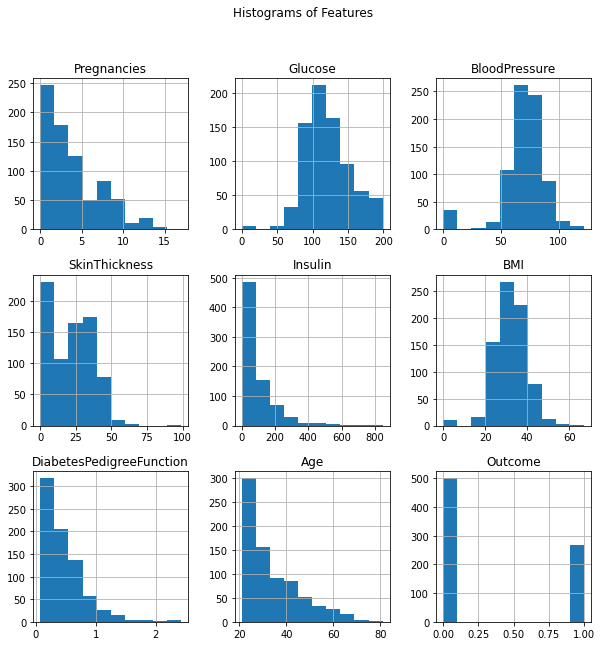

In [5]:
df.hist(figsize=(10,10))
plt.suptitle('Histograms of Features')
plt.show()

**Step V : Checking if the variable are independent**

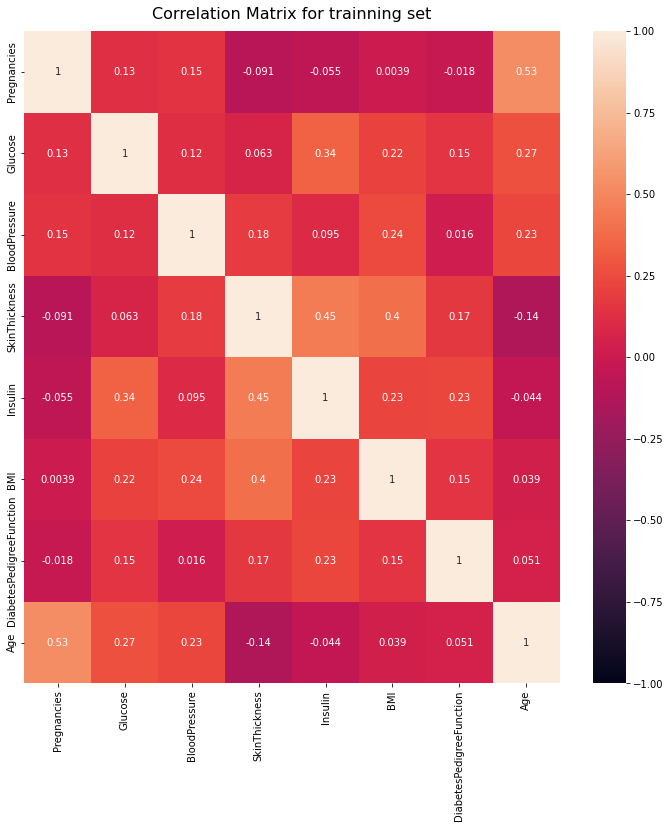

In [6]:
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(X_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Matrix for trainning set', fontdict={'fontsize':16}, pad=12);

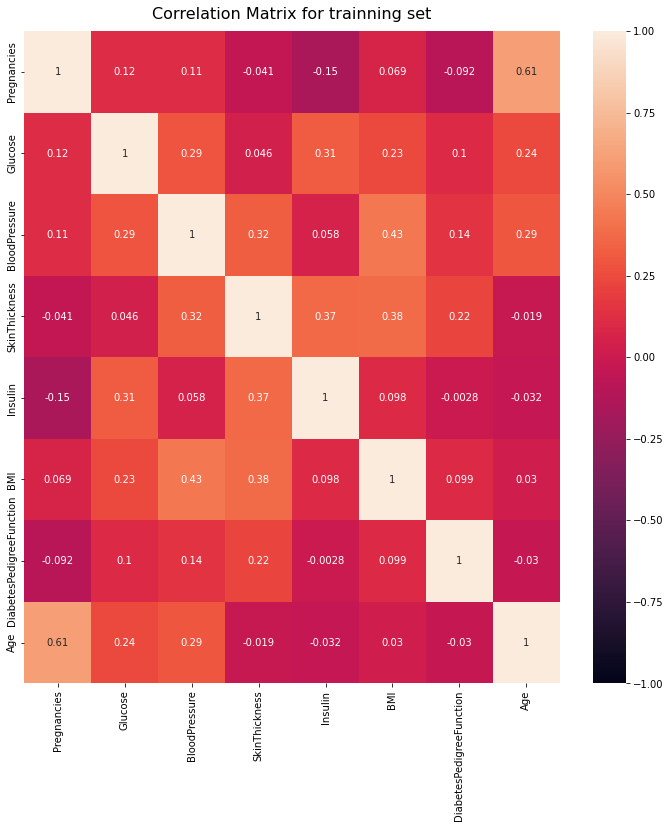

In [7]:
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(X_test.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Matrix for trainning set', fontdict={'fontsize':16}, pad=12);

**Step VI : Replacing zero (0) by the mean**

In [8]:
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(missing_values = 0, strategy = 'mean')
Imputer.fit(X_train[["Insulin","BloodPressure","SkinThickness","BMI","DiabetesPedigreeFunction","Age"]])
X_train[["Insulin","BloodPressure","SkinThickness","BMI","DiabetesPedigreeFunction","Age"]] = Imputer.transform(X_train[["Insulin","BloodPressure","SkinThickness","BMI","DiabetesPedigreeFunction","Age"]])
Imputer.fit(X_test[["Insulin","BloodPressure","SkinThickness","BMI","DiabetesPedigreeFunction","Age"]])
X_test[["Insulin","BloodPressure","SkinThickness","BMI","DiabetesPedigreeFunction","Age"]] = Imputer.transform(X_test[["Insulin","BloodPressure","SkinThickness","BMI","DiabetesPedigreeFunction","Age"]])

**Step VII : Outliers**

In [9]:
from scipy import stats
X_train = X_train.apply(stats.zscore)

**Step VIII : Standardising data - Feature normalisation**

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X_train = StandardScaler()
sc_X_test = StandardScaler()
X_train = sc_X_train.fit_transform(X_train)
X_test = sc_X_test.fit_transform(X_test)

**Step IX: Decision Tree**

Training the Decision Tree Regression model on the whole dataset

In [11]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

Predicting the Test set results

In [12]:
y_pred = regressor.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1.])

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(Y_test, y_pred)
accuracy_score1 = [0]*6
f1_score1 = [0]*6
print(cm)
accuracy_score1[0] = accuracy_score(Y_test, y_pred)
print(accuracy_score(Y_test, y_pred))
f1_score1[0] = f1_score(Y_test, y_pred)
print(f1_score(Y_test, y_pred))

[[77 22]
 [22 33]]
0.7142857142857143
0.6


**Step X: Logisitic Regression**

Training the Logisitic Regression model on the whole dataset

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,Y_train)

LogisticRegression(random_state=0)

Predicting the Test set results

In [15]:
y_pred = classifier.predict(X_test)

Making confusion matrix and calculate the score

In [16]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score1[1] = accuracy_score(Y_test, y_pred)
print(accuracy_score(Y_test, y_pred))
f1_score1[1] = f1_score(Y_test, y_pred)
print(f1_score(Y_test, y_pred))

[[88 11]
 [26 29]]
0.7597402597402597
0.6105263157894736


**Step XI: Random Forest**

Training the random forest model on the whole dataset

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(n_estimators=5 , random_state=0)
clf.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=5, random_state=0)

Predicting the Test set results

In [18]:
y_pred = clf.predict(X_test)

Making confusion matrix and calculate the score

In [19]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score1[2] = accuracy_score(Y_test, y_pred)
print(accuracy_score(Y_test, y_pred))
f1_score1[2] = f1_score(Y_test, y_pred)
print(f1_score(Y_test, y_pred))

[[86 13]
 [19 36]]
0.7922077922077922
0.6923076923076923


**Step XII: Support Vector Machine**

Training the Support vector machine on the whole dataset

In [20]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, Y_train)

SVC()

Predicting the Test set results

In [21]:
y_pred = clf.predict(X_test)

Making confusion matrix and calculate the score

In [22]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score1[3] = accuracy_score(Y_test, y_pred)
print(accuracy_score(Y_test, y_pred))
f1_score1[3] = f1_score(Y_test, y_pred)
print(f1_score(Y_test, y_pred))

[[93  6]
 [27 28]]
0.7857142857142857
0.6292134831460674


**Step XIII: K-Nearest Neighbors (KNN)**

Training the K-Nearest Neighbors on the whole dataset

In [23]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=3)

Predicting the Test set results

In [24]:
y_pred = neigh.predict(X_test)

Making confusion matrix and calculate the score

In [25]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score1[4] = accuracy_score(Y_test, y_pred)
print(accuracy_score(Y_test, y_pred))
f1_score1[4] = f1_score(Y_test, y_pred)
print(f1_score(Y_test, y_pred))

[[88 11]
 [20 35]]
0.7987012987012987
0.693069306930693


**Step XIV: Artificial Neural Network**

Training the Artificial Neural Network

In [26]:
import tensorflow as tf

ann = tf.keras.models.Sequential()

In [27]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [28]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [29]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [30]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [31]:
ann.fit(X_train, Y_train, batch_size = 32, epochs = 100)

Epoch 1/100
20/20 [==============================] - 4s 6ms/step - loss: 0.7030 - accuracy: 0.4984
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6790 - accuracy: 0.5717
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6601 - accuracy: 0.6156
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6445 - accuracy: 0.6547
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6283 - accuracy: 0.6710
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6143 - accuracy: 0.6840
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6010 - accuracy: 0.6971
Epoch 8/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5889 - accuracy: 0.7052
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5776 - accuracy: 0.7085
Epoch 10/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5676 - accuracy: 0.7052
Epoch 11/

Predicting the Test set results

In [32]:
y_pred = ann.predict(X_test)

5/5 [==============================] - 0s 5ms/step


In [33]:
y_pred = (y_pred > 0.5)

Making confusion matrix and calculate the score

In [34]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score1[5] = accuracy_score(Y_test, y_pred)
print(accuracy_score(Y_test, y_pred))
f1_score1[5] = f1_score(Y_test, y_pred)
print(f1_score(Y_test, y_pred))

[[85 14]
 [21 34]]
0.7727272727272727
0.6601941747572815


**Step XV : Data Visualisation**

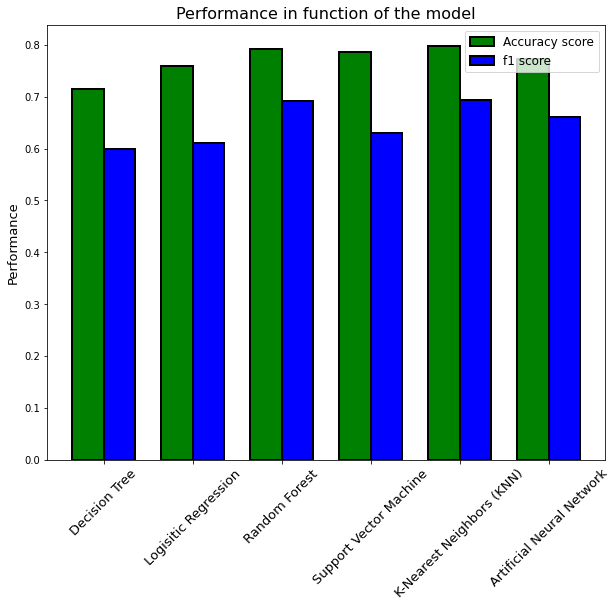

In [35]:
largeur_barre = 0.35 
names = ['Decision Tree', 'Logisitic Regression', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors (KNN)','Artificial Neural Network']
x1 = range(len(names)) 
x2 = [i + largeur_barre for i in x1]
f = plt.figure(figsize=(10, 8))
plt.ylabel('Performance',fontsize = 13)
plt.title("Performance in function of the model",fontsize = 16)
plt.bar(x1,accuracy_score1,width=0.35, color = 'green',edgecolor = 'black', linewidth = 2)
plt.bar(x2,f1_score1,width=0.35, color = 'blue', edgecolor = 'black', linewidth = 2)
plt.xticks([r + largeur_barre / 2 for r in range(len(x1))],names,fontsize = 13,rotation =45)
plt.legend(['Accuracy score','f1 score'],fontsize = 12)
plt.show()

**Step XVI : Voting Classifier**

Training the model

In [36]:
from sklearn.ensemble import VotingClassifier
model_A = LogisticRegression(random_state = 0)
model_B = KNeighborsClassifier(n_neighbors=3)
model_C = svm.SVC(random_state=0)
model_D = VotingClassifier([('Logistic Regression', model_A),
                            ('KNN',model_B),
                            ('SVM',model_C)],
                           voting = 'hard')

for model in (model_A, model_B, model_C,model_D):
  model.fit(X_train, Y_train)


Predicting the Test set results

In [37]:
y_pred = model.predict(X_test)

Making confusion matrix and calculate the score

In [38]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print(accuracy_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

[[92  7]
 [27 28]]
0.7792207792207793
0.6222222222222221


**Step XVII : Bagging**

Training the model

In [39]:
from sklearn.ensemble import BaggingClassifier
model2 = BaggingClassifier(base_estimator = LogisticRegression(random_state = 0), n_estimators = 100)
model2.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=LogisticRegression(random_state=0),
                  n_estimators=100)

Predicting the Test set results

In [40]:
y_pred = model2.predict(X_test)

Making confusion matrix and calculate the score

In [41]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print(accuracy_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

[[88 11]
 [26 29]]
0.7597402597402597
0.6105263157894736


**XVIII : Boosting**

Training the model

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

Predicting the Test set results

In [43]:
y_pred = clf.predict(X_test)

Making confusion matrix and calculate the score

In [44]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print(accuracy_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

[[84 15]
 [18 37]]
0.7857142857142857
0.6915887850467289


**Step XIX : Stacking**

Training the model

In [45]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
estimators = [
        ('lr', LogisticRegression(random_state = 0)),
        ('KNN',KNeighborsClassifier(n_neighbors=3)),
        ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
        ('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train,Y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

StackingClassifier(estimators=[('lr', LogisticRegression(random_state=0)),
                               ('KNN', KNeighborsClassifier(n_neighbors=3)),
                               ('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))]))],
                   final_estimator=LogisticRegression())

Predicting the Test set results

In [46]:
y_pred = clf.predict(X_test)

Making confusion matrix and calculate the score

In [47]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print(accuracy_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

[[87 12]
 [25 30]]
0.7597402597402597
0.6185567010309277


**Step XX : Importance of feature with decision tree**

In [48]:
tree = DecisionTreeRegressor(random_state = 0)
tree.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

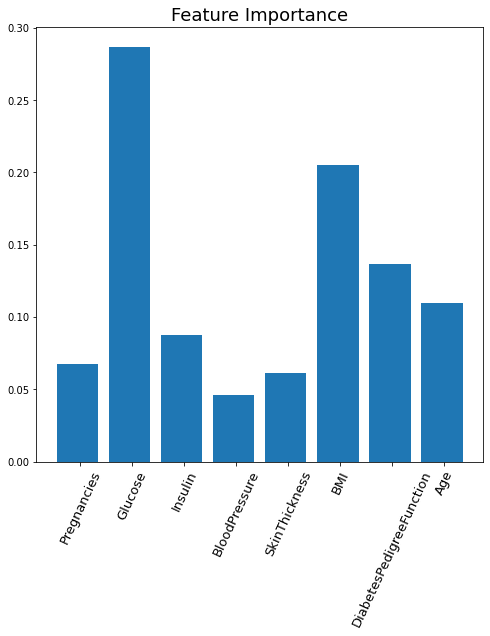

In [49]:
from sklearn.datasets import make_regression
Names= ["Pregnancies","Glucose","Insulin","BloodPressure","SkinThickness","BMI","DiabetesPedigreeFunction","Age"]
f = plt.figure(figsize=(8, 8))
importance = tree.feature_importances_
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([r + 0.1 / 2 for r in range(len(importance))],Names,fontsize = 13,rotation=65)
plt.title("Feature Importance", fontsize = 18)
plt.show()